In [1]:
titanic = read.csv("C:/Users/student/Documents/titanic.csv")

titanic$PassengerId =  NULL
titanic$Ticket =  NULL
titanic$Name = NULL
titanic$Cabin = NULL
titanic$Survived = factor(titanic$Survived)
titanic$Pclass = factor(titanic$Pclass)
levels(titanic$Embarked) = c("S","C","Q","S")

adult <- read.csv("C:/Users/student/Desktop/adult.csv", header = FALSE)

names(adult) <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss","hours_per_week", "native_country","income")

levels(adult$`native_country`) = c(" ?", " Asia", " North America", " Asia", " South America", " North America", " North America", " South America", " North America", " Europe", " Europe", " Europe", " Europe", " North America", " North America", " Europe", " North America", " Asia", " Europe", " Asia", " Asia", " Europe", " Europe", " Africa", " Asia", " Asia", " North America", " North America", " North America", " South America", " Asia", " Europe", " Europe", " North America", " Europe", " South America", " Asia", " Asia", " North America", " North America", " Asia", " Europe")

levels(adult$education) = c("HS drop out", "HS drop out", "HS drop out", "no HS", "no HS", "no HS", "HS drop out", "2 years of college", "2 years of college", "Bachelors or higher", "Bachelors or higher", "HS-grad", "Bachelors or higher", "no HS", "no HS", "HS-grad")

levels(adult$occupation) = c(" ?", " Management", " Military", " Other", " Management", " Other", " Other", " Other", " Other", " Other", " Specialty", " Other", " Other", " Tech", " Other")


library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [2]:
for (i in 1:ncol(adult))
{ for (j in 1:nrow(adult))
{ if(adult[j,i] == " ?")
{
  adult[j,i] = NA
}
}
}

for (i in 1:ncol(adult))
{ if(class(adult[,i]) == "factor")
{
  adult[,i][is.na(adult[,i])] = unique(adult[,i])[which.max(tabulate(match(adult,unique(adult[,i]))))]
}
}


##adult
preProcess_missingdata_model <- preProcess(adult, method = c('knnImpute','center','scale'))
trainData1 <- predict(preProcess_missingdata_model, newdata = adult)

dummies_model <- dummyVars(income ~ ., data=trainData1)

trainData_mat <- predict(dummies_model, newdata = trainData1)


trainData1 <- data.frame(trainData_mat)
trainData1$income <- adult$income

##titanic
preProcess_missingdata_model2 <- preProcess(titanic, method = c('knnImpute', "center","scale"))
trainData2 <- predict(preProcess_missingdata_model2, newdata = titanic)

dummies_model <- dummyVars(Survived ~ ., data=trainData2)

trainData_mat <- predict(dummies_model, newdata = trainData2)

trainData2 <- data.frame(trainData_mat)
trainData2$Survived <- titanic$Survived

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'income' is not a factor"Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'Survived' is not a factor"

In [3]:
myGrid1 = expand.grid(mtry = c(2,3), splitrule = c("gini"),
                     min.node.size = 30)

model1 <- train(income~.,data = trainData1, method = "ranger", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE), tuneGrid = myGrid1)

model1


model2 <- train(Survived~.,data = trainData2, method = "ranger", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE), tuneGrid = myGrid1)

model2


+ Fold1: mtry=2, splitrule=gini, min.node.size=30 
- Fold1: mtry=2, splitrule=gini, min.node.size=30 
+ Fold1: mtry=3, splitrule=gini, min.node.size=30 
- Fold1: mtry=3, splitrule=gini, min.node.size=30 
+ Fold2: mtry=2, splitrule=gini, min.node.size=30 
- Fold2: mtry=2, splitrule=gini, min.node.size=30 
+ Fold2: mtry=3, splitrule=gini, min.node.size=30 
- Fold2: mtry=3, splitrule=gini, min.node.size=30 
+ Fold3: mtry=2, splitrule=gini, min.node.size=30 
- Fold3: mtry=2, splitrule=gini, min.node.size=30 
+ Fold3: mtry=3, splitrule=gini, min.node.size=30 
- Fold3: mtry=3, splitrule=gini, min.node.size=30 
+ Fold4: mtry=2, splitrule=gini, min.node.size=30 
- Fold4: mtry=2, splitrule=gini, min.node.size=30 
+ Fold4: mtry=3, splitrule=gini, min.node.size=30 
- Fold4: mtry=3, splitrule=gini, min.node.size=30 
+ Fold5: mtry=2, splitrule=gini, min.node.size=30 
- Fold5: mtry=2, splitrule=gini, min.node.size=30 
+ Fold5: mtry=3, splitrule=gini, min.node.size=30 
- Fold5: mtry=3, splitrule=gini

Random Forest 

32561 samples
   52 predictor
    2 classes: ' <=50K', ' >50K' 

No pre-processing
Resampling: Cross-Validated (7 fold) 
Summary of sample sizes: 27909, 27908, 27910, 27910, 27910, 27910, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8258346  0.4180618
  3     0.8461349  0.5251324

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 30
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 3, splitrule = gini
 and min.node.size = 30.

+ Fold1: mtry=2, splitrule=gini, min.node.size=30 
- Fold1: mtry=2, splitrule=gini, min.node.size=30 
+ Fold1: mtry=3, splitrule=gini, min.node.size=30 
- Fold1: mtry=3, splitrule=gini, min.node.size=30 
+ Fold2: mtry=2, splitrule=gini, min.node.size=30 
- Fold2: mtry=2, splitrule=gini, min.node.size=30 
+ Fold2: mtry=3, splitrule=gini, min.node.size=30 
- Fold2: mtry=3, splitrule=gini, min.node.size=30 
+ Fold3: mtry=2, splitrule=gini, min.node.size=30 
- Fold3: mtry=2, splitrule=gini, min.node.size=30 
+ Fold3: mtry=3, splitrule=gini, min.node.size=30 
- Fold3: mtry=3, splitrule=gini, min.node.size=30 
+ Fold4: mtry=2, splitrule=gini, min.node.size=30 
- Fold4: mtry=2, splitrule=gini, min.node.size=30 
+ Fold4: mtry=3, splitrule=gini, min.node.size=30 
- Fold4: mtry=3, splitrule=gini, min.node.size=30 
+ Fold5: mtry=2, splitrule=gini, min.node.size=30 
- Fold5: mtry=2, splitrule=gini, min.node.size=30 
+ Fold5: mtry=3, splitrule=gini, min.node.size=30 
- Fold5: mtry=3, splitrule=gini

Random Forest 

891 samples
 12 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (7 fold) 
Summary of sample sizes: 763, 764, 764, 764, 764, 763, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8103294  0.5770541
  3     0.8170434  0.5928064

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 30
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 3, splitrule = gini
 and min.node.size = 30.

In [4]:
myGrid2 = expand.grid(cp = c(10:20))

model3 <- train(income~.,data = trainData1, method = "rpart", 
                trControl = trainControl(method ="cv", number = 10, verboseIter = TRUE), tuneGrid = myGrid2)

model3

#Accuracy = .7591904 at all cps


model4 <- train(Survived~.,data = trainData2, method = "rpart", 
               trControl = trainControl(method ="cv", number = 10, verboseIter = TRUE), tuneGrid = myGrid2)

model4

+ Fold01: cp=10 
- Fold01: cp=10 
+ Fold02: cp=10 
- Fold02: cp=10 
+ Fold03: cp=10 
- Fold03: cp=10 
+ Fold04: cp=10 
- Fold04: cp=10 
+ Fold05: cp=10 
- Fold05: cp=10 
+ Fold06: cp=10 
- Fold06: cp=10 
+ Fold07: cp=10 
- Fold07: cp=10 
+ Fold08: cp=10 
- Fold08: cp=10 
+ Fold09: cp=10 
- Fold09: cp=10 
+ Fold10: cp=10 
- Fold10: cp=10 
Aggregating results
Selecting tuning parameters
Fitting cp = 20 on full training set


CART 

32561 samples
   52 predictor
    2 classes: ' <=50K', ' >50K' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 29304, 29305, 29305, 29305, 29305, 29305, ... 
Resampling results across tuning parameters:

  cp  Accuracy   Kappa
  10  0.7591904  0    
  11  0.7591904  0    
  12  0.7591904  0    
  13  0.7591904  0    
  14  0.7591904  0    
  15  0.7591904  0    
  16  0.7591904  0    
  17  0.7591904  0    
  18  0.7591904  0    
  19  0.7591904  0    
  20  0.7591904  0    

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 20.

+ Fold01: cp=10 
- Fold01: cp=10 
+ Fold02: cp=10 
- Fold02: cp=10 
+ Fold03: cp=10 
- Fold03: cp=10 
+ Fold04: cp=10 
- Fold04: cp=10 
+ Fold05: cp=10 
- Fold05: cp=10 
+ Fold06: cp=10 
- Fold06: cp=10 
+ Fold07: cp=10 
- Fold07: cp=10 
+ Fold08: cp=10 
- Fold08: cp=10 
+ Fold09: cp=10 
- Fold09: cp=10 
+ Fold10: cp=10 
- Fold10: cp=10 
Aggregating results
Selecting tuning parameters
Fitting cp = 20 on full training set


CART 

891 samples
 12 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 802, 802, 802, 802, 803, 801, ... 
Resampling results across tuning parameters:

  cp  Accuracy   Kappa
  10  0.6161701  0    
  11  0.6161701  0    
  12  0.6161701  0    
  13  0.6161701  0    
  14  0.6161701  0    
  15  0.6161701  0    
  16  0.6161701  0    
  17  0.6161701  0    
  18  0.6161701  0    
  19  0.6161701  0    
  20  0.6161701  0    

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 20.

In [5]:
model1


model2


Random Forest 

32561 samples
   52 predictor
    2 classes: ' <=50K', ' >50K' 

No pre-processing
Resampling: Cross-Validated (7 fold) 
Summary of sample sizes: 27909, 27908, 27910, 27910, 27910, 27910, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8258346  0.4180618
  3     0.8461349  0.5251324

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 30
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 3, splitrule = gini
 and min.node.size = 30.

Random Forest 

891 samples
 12 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (7 fold) 
Summary of sample sizes: 763, 764, 764, 764, 764, 763, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8103294  0.5770541
  3     0.8170434  0.5928064

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 30
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 3, splitrule = gini
 and min.node.size = 30.

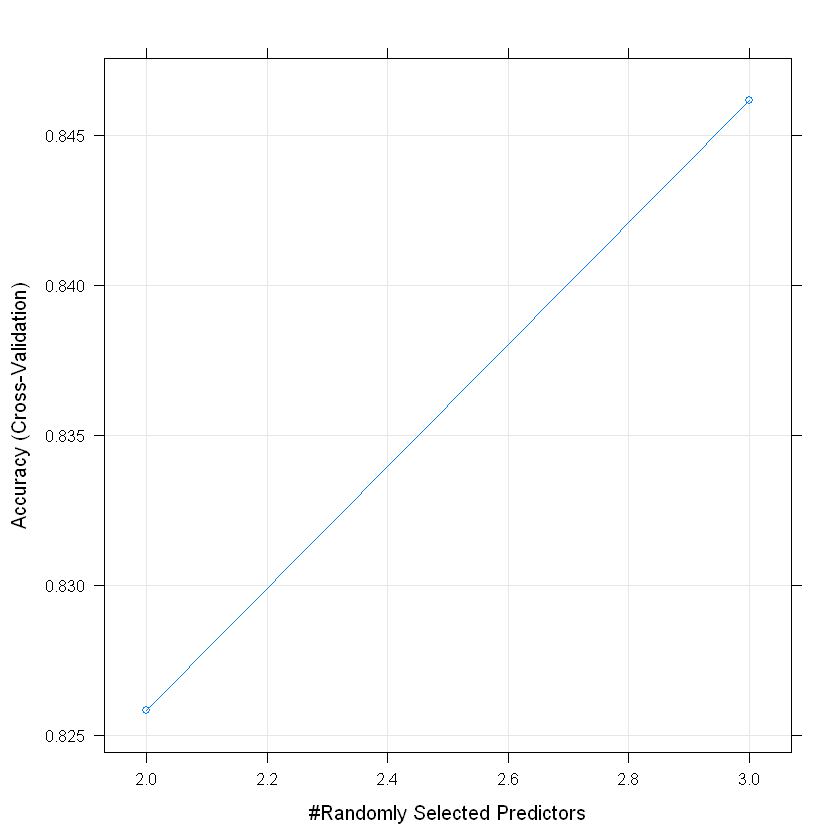

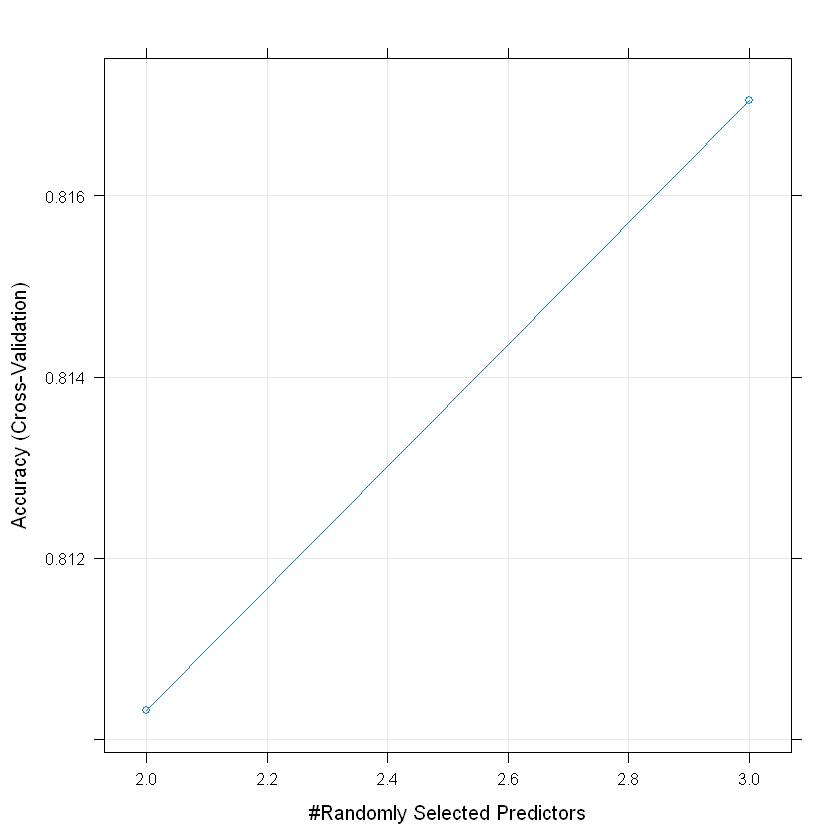

In [6]:
plot(model1)
plot(model2)

In [ ]:
myGrid3 = expand.grid(mtry = c(1:ncol(adult)-1), splitrule = c("gini","extratrees"),
                     min.node.size = c(1:20))

model5 <- train(income~.,data = trainData1, method = "ranger", 
               trControl = trainControl(method ="cv", number = 3, verboseIter = TRUE), tuneGrid = myGrid3)

model5


model6 <- train(Survived~.,data = trainData2, method = "ranger", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE), tuneGrid = myGrid3)

model6

In [ ]:

model7 <- train(income~.,data = trainData1, method = "glmnet", 
                trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE))


model8 <- train(Survived~.,data = trainData2, method = "glmnet", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE))

model8


myGrid4 = expand.grid(alpha = 0:1, lambda = seq(.0001, 1, length = 20))


model9 <- train(income~.,data = trainData1, method = "glmnet", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE), tuneGrid = myGrid4)

model9



model10 <- train(Survived~.,data = trainData2, method = "glmnet", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE), tuneGrid = myGrid4)

model10